# Modelo machine learning - Previsão Churn

**Analise de Churn**

Customer Churn (ou Rotatividade de Clientes, em uma tradução livre) refere-se a uma decisão tomada pelo cliente sobre o término do relacionamento comercial. Refere-se também à perda de clientes. A fidelidade do cliente e a rotatividade de clientes sempre somam 100%. Se uma empresa tem uma taxa de fidelidade de 60%, então a taxa de perda de clientes é de 40%. De acordo com a regra de lucratividade do cliente 80/20, 20% dos clientes estão gerando 80% da receita. Portanto, é muito importante prever os usuários que provavelmente abandonarão o relacionamento comercial e os fatores que afetam as decisões do cliente.

**O que é Churn**

- Churn, numa definição mais generalista, é uma métrica que indica o número de clientes que cancelam em determinado período de tempo. Para calcular o churn, o que você precisa fazer é somar o número de clientes que cancelou seu produto/serviço no período analisado.

- Churn = total de clientes cancelados Para que uma empresa consiga fazer a expansão da sua base de clientes, é preciso que o número de novos clientes exceda o seu churn rate – a taxa de clientes cancelados.

In [1]:
from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.7.4


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

warnings.filterwarnings("ignore")

In [3]:
%reload_ext watermark

%watermark -a "Rafael Gallo" --iversions

Author: Rafael Gallo

seaborn   : 0.9.0
matplotlib: 3.1.1
numpy     : 1.16.5
pandas    : 0.25.1



In [4]:
sns.set_palette("Accent")
sns.set(style="whitegrid", color_codes=True, font_scale=1.8)

color = sns.color_palette()

# Base de dados

In [5]:
data_train = pd.read_csv("projeto4_telecom_treino.csv")
data_test = pd.read_csv("projeto4_telecom_teste.csv")

In [6]:
# Exebindo o 5 primeiro dados 

data_train.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [7]:
# Exebindo o 5 últimos dados 

data_test.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,4,NM,99,area_code_415,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,5,SC,108,area_code_415,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


# Data exploration

In [8]:
# Número de linhas e colunas 

data_train.shape

(3333, 21)

In [9]:
# Informando as informações e das variaveis 

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Unnamed: 0                       3333 non-null int64
state                            3333 non-null object
account_length                   3333 non-null int64
area_code                        3333 non-null object
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes           

In [10]:
# Exibido os tipos de dados

data_train.dtypes

Unnamed: 0                         int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [11]:
# Drop - Remova os rótulos especificados das linhas ou colunas.

data_train.drop("Unnamed: 0", axis = 1, inplace = True)

In [12]:
# isnull - Retorna um objeto booleano de mesmo tamanho indicando se os valores são NA e contagem de dados nulos

data_train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [13]:
# dropna - Remova os valores ausentes do dataset

data_train = data_train.dropna()
data_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
3329,WV,68,area_code_415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
3330,RI,28,area_code_510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no
3331,CT,184,area_code_510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,no


In [14]:
# sum() Retorna a soma dos valores sobre o eixo solicitado
# isna() Detecte valores ausentes

data_train.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [15]:
# Retorna a soma dos valores sobre o eixo solicitado
# Detecta valores não ausentes para um objeto semelhante a uma matriz.

data_train.notnull().sum()

state                            3333
account_length                   3333
area_code                        3333
international_plan               3333
voice_mail_plan                  3333
number_vmail_messages            3333
total_day_minutes                3333
total_day_calls                  3333
total_day_charge                 3333
total_eve_minutes                3333
total_eve_calls                  3333
total_eve_charge                 3333
total_night_minutes              3333
total_night_calls                3333
total_night_charge               3333
total_intl_minutes               3333
total_intl_calls                 3333
total_intl_charge                3333
number_customer_service_calls    3333
churn                            3333
dtype: int64

In [16]:
# var() - Retorna a variação imparcial

data_train.var()

account_length                   1585.800121
number_vmail_messages             187.371347
total_day_minutes                2966.696487
total_day_calls                   402.768141
total_day_charge                   85.737128
total_eve_minutes                2571.894016
total_eve_calls                   396.910999
total_eve_charge                   18.581856
total_night_minutes              2557.714002
total_night_calls                 382.930472
total_night_charge                  5.179597
total_intl_minutes                  7.794368
total_intl_calls                    6.057576
total_intl_charge                   0.568173
number_customer_service_calls       1.730517
dtype: float64

In [17]:
# Total de número duplicados

data_train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

In [18]:
# Contagem de dados da coluna account_length

data_train.groupby(['account_length'])['account_length'].count()

account_length
1      8
2      1
3      5
4      1
5      1
      ..
221    1
224    2
225    2
232    1
243    1
Name: account_length, Length: 212, dtype: int64

In [19]:
# Total de colunas e linhas 

print("Rows:", data_train.shape[0])
print("Columns:", data_train.shape[1])

Rows: 3333
Columns: 20


In [20]:
# Exibindo valores ausentes e Valores únicos

print("\nMissing values :  ", data_train.isnull().sum().values.sum())
print("\nUnique values :  \n",data_train.nunique())


Missing values :   0

Unique values :  
 state                              51
account_length                    212
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1667
total_day_calls                   119
total_day_charge                 1667
total_eve_minutes                1611
total_eve_calls                   123
total_eve_charge                 1440
total_night_minutes              1591
total_night_calls                 120
total_night_charge                933
total_intl_minutes                162
total_intl_calls                   21
total_intl_charge                 162
number_customer_service_calls      10
churn                               2
dtype: int64


In [21]:
# Contagem de number_customer_service_calls máximo 

data_train.number_customer_service_calls.max()

9

In [22]:
# Contagem de number_customer_service_calls Minimo 

data_train.number_customer_service_calls.min()

0

In [23]:
# Retorna valores únicos de um índice 

data = sorted(data_train["total_day_minutes"].unique())
data

[0.0,
 2.6,
 7.8,
 7.9,
 12.5,
 17.6,
 18.9,
 19.5,
 25.9,
 27.0,
 29.9,
 30.9,
 34.0,
 35.1,
 37.7,
 37.8,
 39.5,
 40.4,
 40.9,
 41.9,
 44.9,
 45.0,
 46.5,
 47.4,
 47.7,
 47.8,
 48.4,
 49.2,
 49.9,
 50.6,
 51.1,
 51.5,
 51.8,
 51.9,
 52.2,
 54.0,
 54.2,
 54.7,
 54.8,
 55.3,
 55.6,
 57.1,
 57.5,
 58.0,
 58.2,
 58.4,
 58.8,
 58.9,
 59.5,
 60.0,
 60.4,
 60.6,
 61.2,
 61.3,
 61.6,
 61.9,
 62.3,
 62.4,
 62.6,
 62.8,
 62.9,
 63.2,
 63.7,
 64.6,
 64.9,
 65.4,
 67.4,
 67.7,
 68.4,
 68.5,
 68.7,
 69.1,
 69.4,
 70.7,
 70.8,
 70.9,
 71.2,
 72.5,
 72.7,
 72.8,
 73.3,
 73.8,
 74.3,
 74.5,
 75.0,
 75.3,
 75.8,
 76.1,
 76.4,
 77.6,
 78.1,
 78.2,
 78.3,
 78.5,
 78.6,
 78.7,
 80.2,
 80.3,
 81.1,
 81.3,
 81.6,
 81.7,
 81.9,
 82.2,
 82.3,
 82.5,
 82.6,
 82.7,
 83.0,
 83.2,
 83.4,
 83.5,
 83.6,
 83.8,
 84.2,
 84.7,
 84.8,
 84.9,
 85.2,
 85.7,
 85.8,
 85.9,
 86.0,
 86.1,
 86.3,
 86.5,
 86.8,
 87.0,
 87.2,
 87.6,
 87.7,
 88.1,
 88.5,
 88.8,
 89.5,
 89.7,
 89.8,
 90.0,
 90.4,
 90.5,
 90.6,
 90.7,
 91.1,
 91

In [24]:
# Fazendo um reset no dataset na coluna index

df = data_train.reset_index().drop("index", axis = 1)
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
3329,WV,68,area_code_415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
3330,RI,28,area_code_510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no
3331,CT,184,area_code_510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,no


# Estatística descritiva

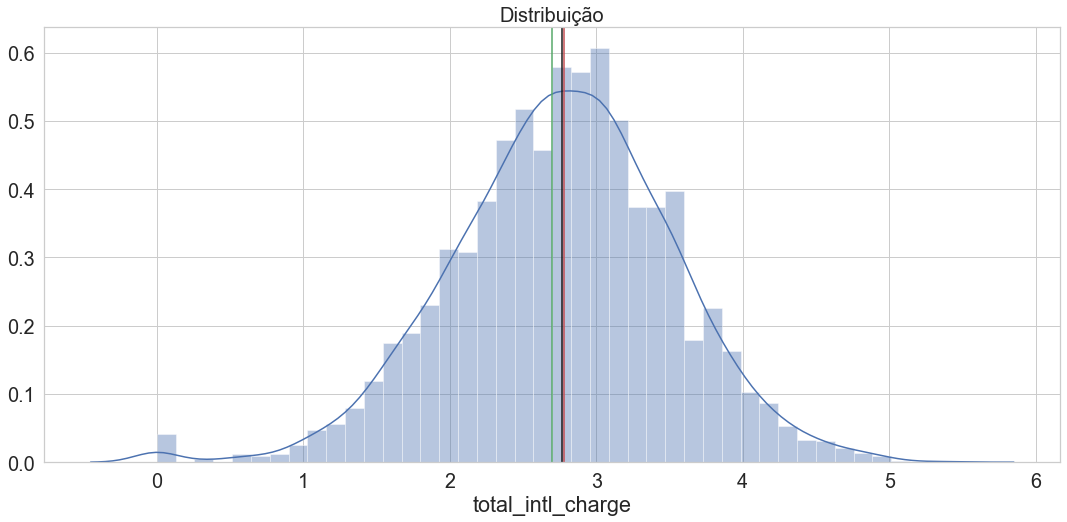

In [25]:
plt.figure(figsize=(18.2, 8))

ax = sns.distplot(data_train['total_intl_charge']);
plt.title("Distribuição", fontsize=20)
plt.axvline(data_train['total_intl_charge'].mean(), color='k')
plt.axvline(data_train['total_intl_charge'].median(), color='r')
plt.axvline(data_train['total_intl_charge'].mode()[0], color='g');

In [26]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.

data_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [27]:
# Matriz correlação de pares de colunas, excluindo NA / valores nulos.

corr = data_train.corr()
corr

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
number_vmail_messages,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
total_day_minutes,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
total_day_calls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
total_day_charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
total_eve_minutes,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
total_eve_calls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
total_eve_charge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
total_night_minutes,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288
total_night_calls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802


(15.0, 0.0)

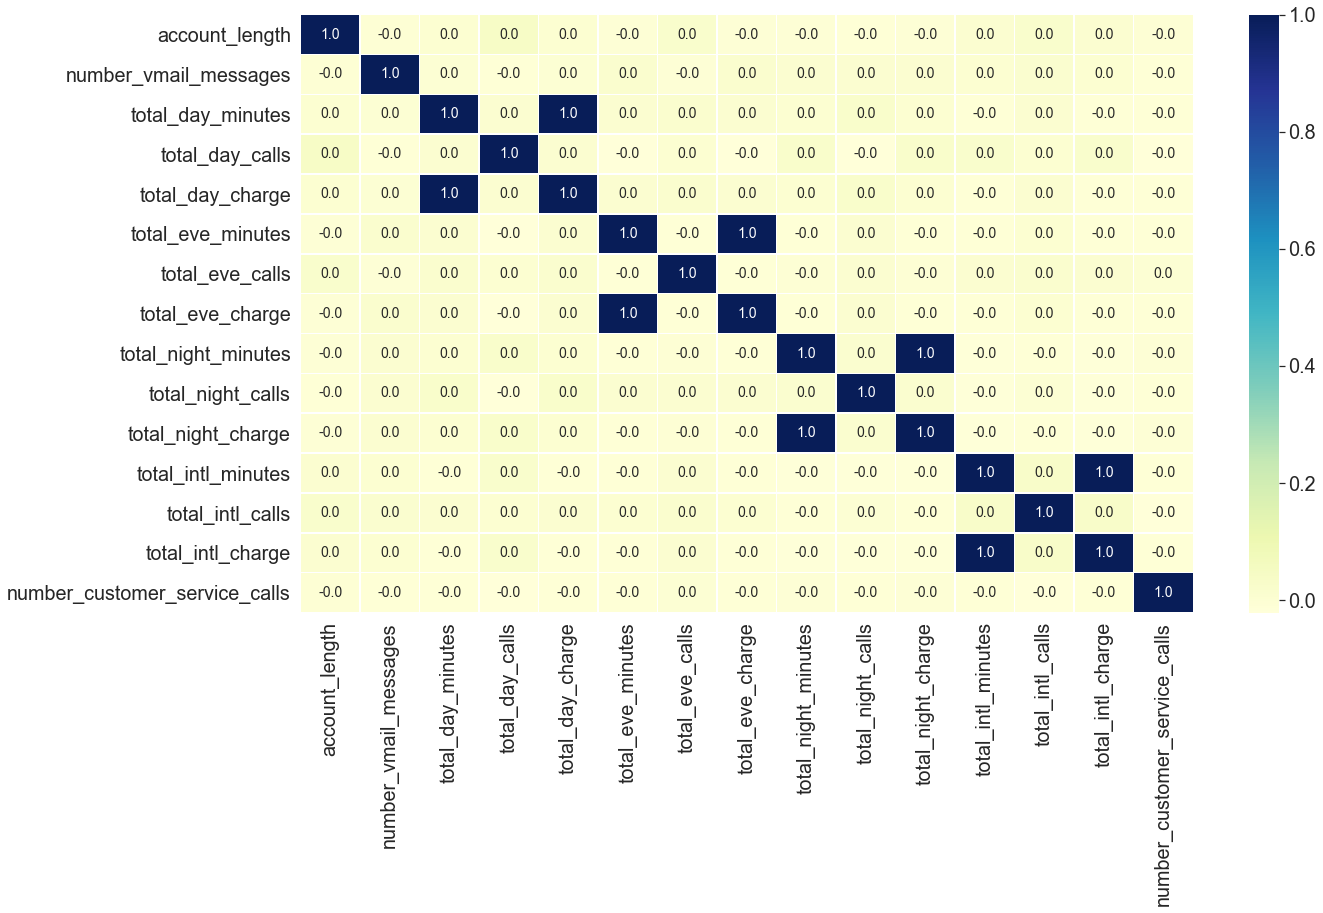

In [28]:
plt.figure(figsize=(20,11))

ax = sns.heatmap(data_train.corr(), annot=True, cmap='YlGnBu', linewidths=.5, annot_kws={'size':14} ,fmt=".1f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

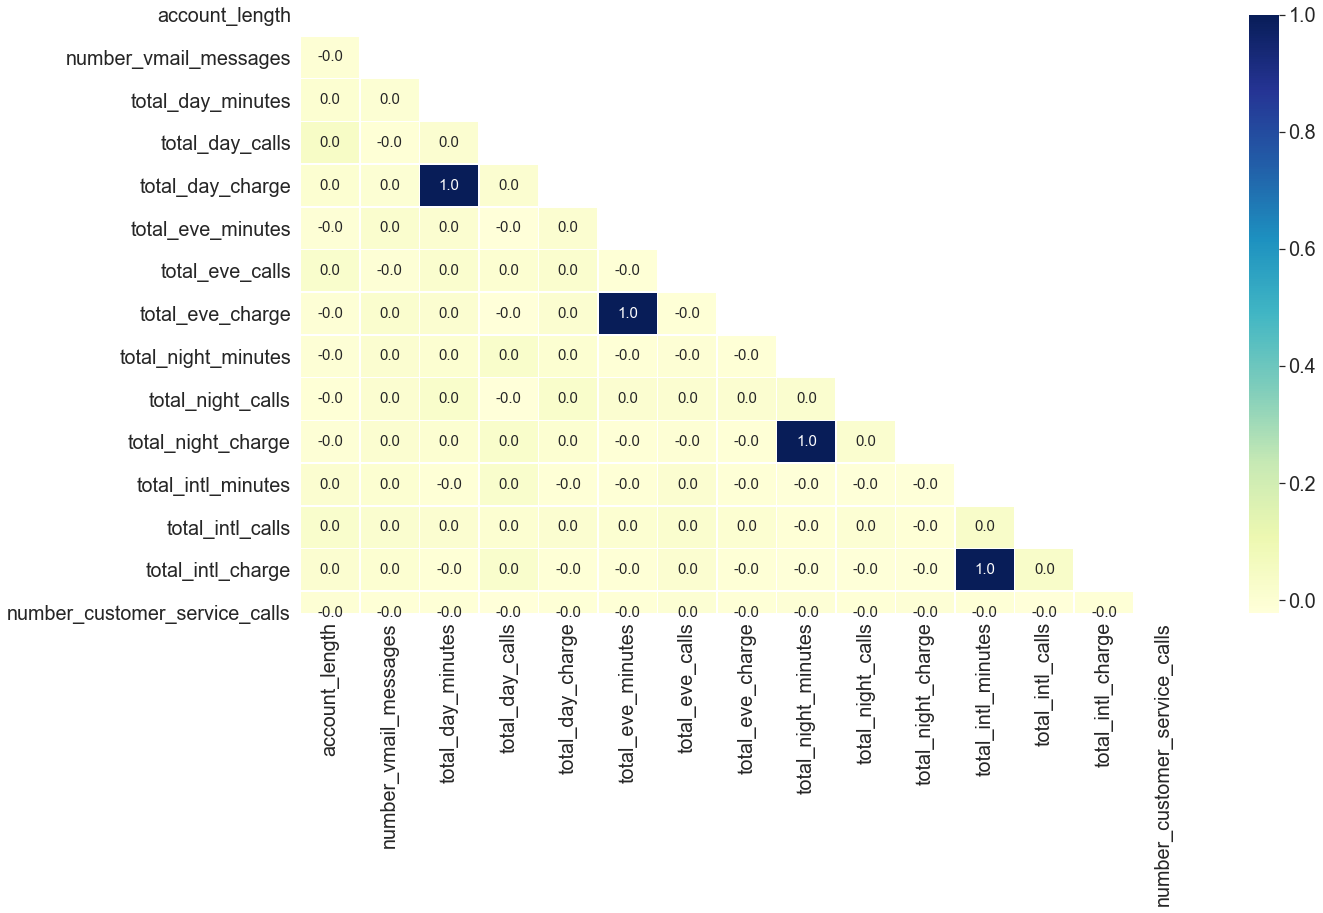

In [29]:
plt.figure(figsize=(20,11))

mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, cmap="YlGnBu", linewidths=.5, annot_kws={'size':15} ,fmt=".1f")
plt.show()

# Análise de dados

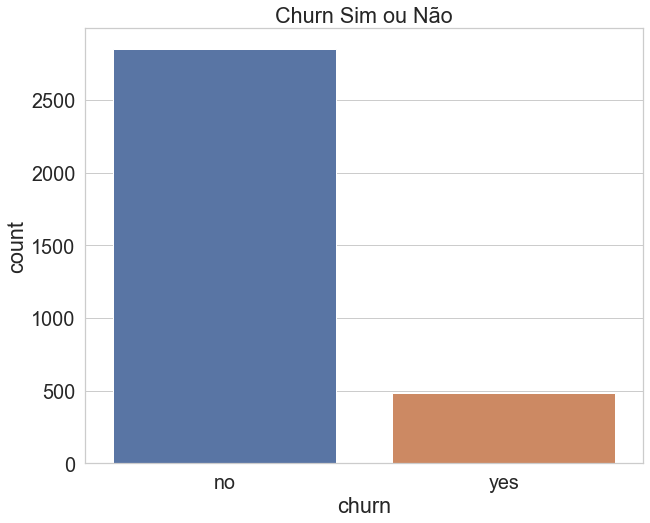

In [30]:
plt.figure(figsize=(10, 8))

plt.title("Churn Sim ou Não")
ax = sns.countplot(data_train["churn"])

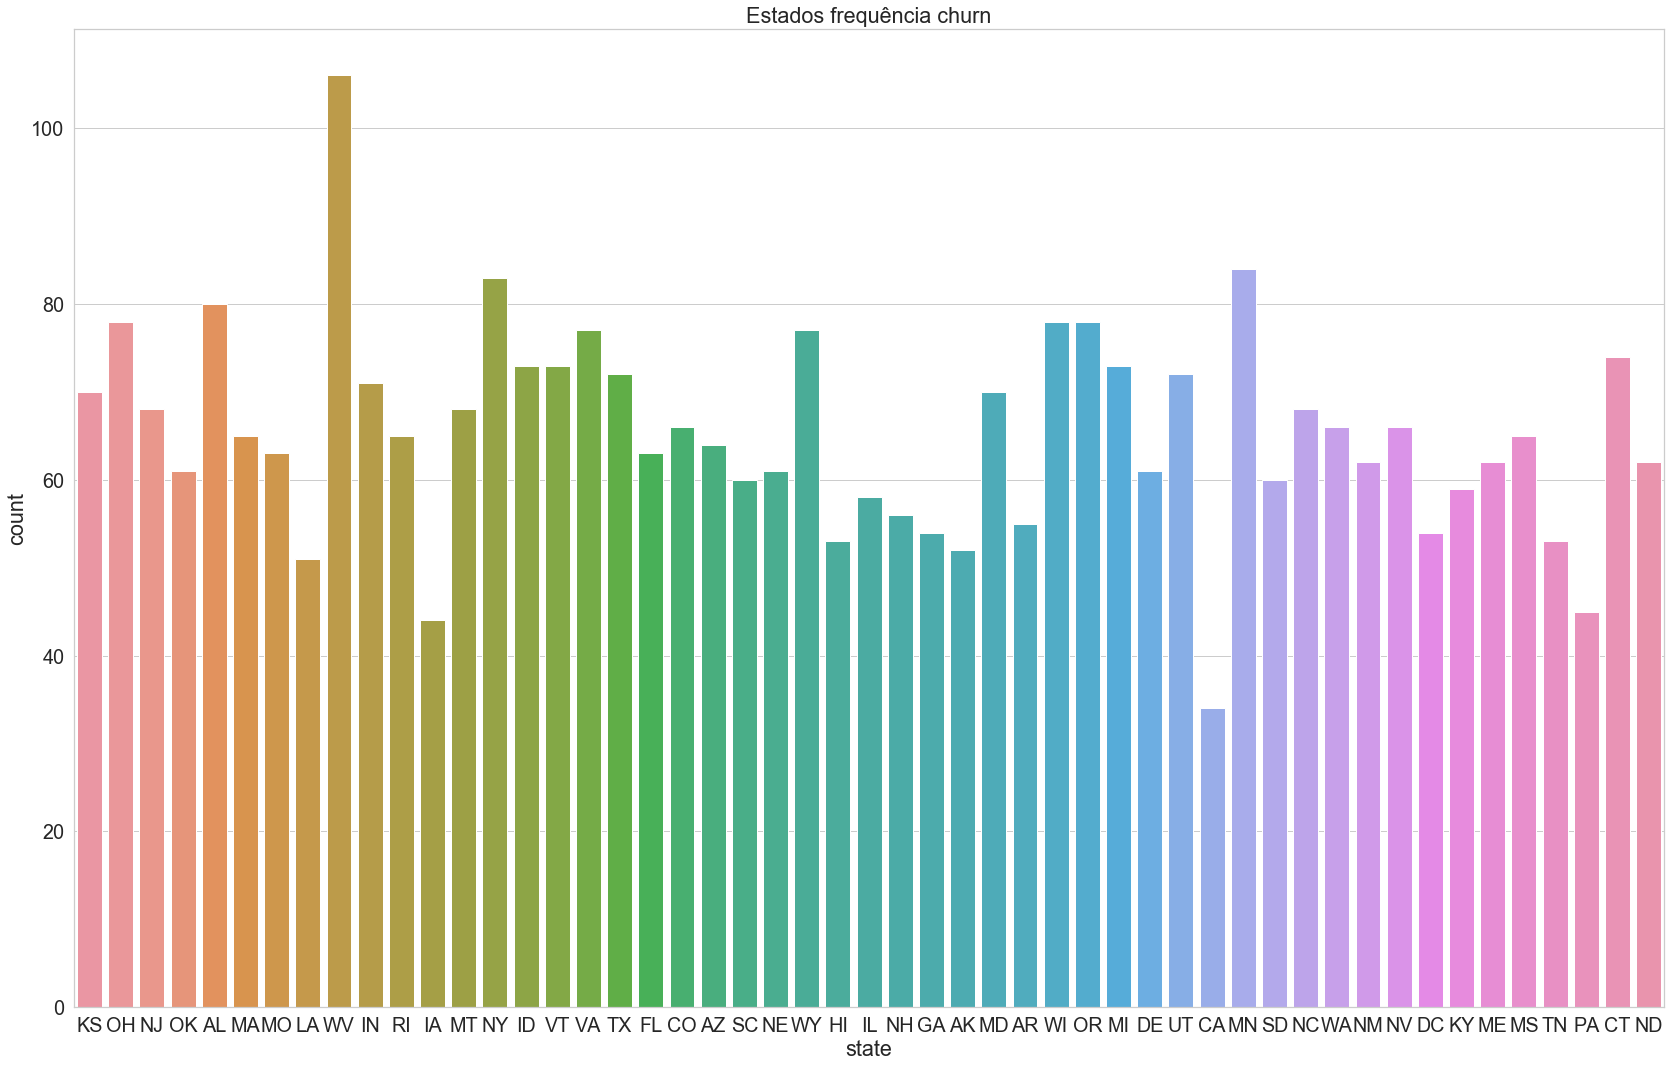

In [31]:
plt.figure(figsize=(28.5, 18))

plt.title("Estados frequência churn")
ax = sns.countplot(data_train["state"])

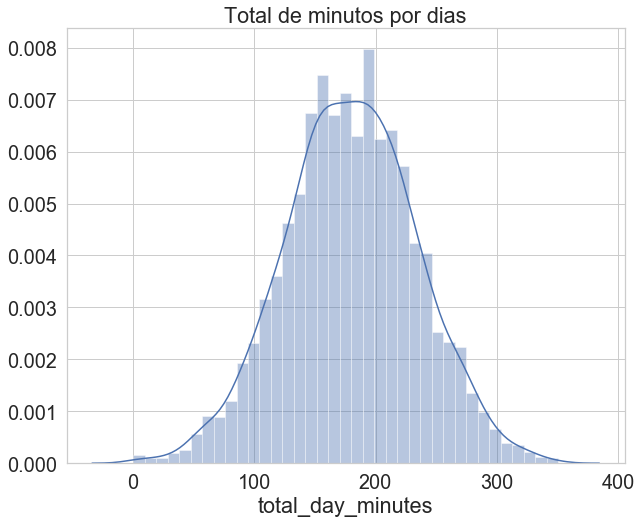

In [32]:
plt.figure(figsize=(10, 8))

plt.title("Total de minutos por dias")
sns.distplot(data_train["total_day_minutes"])

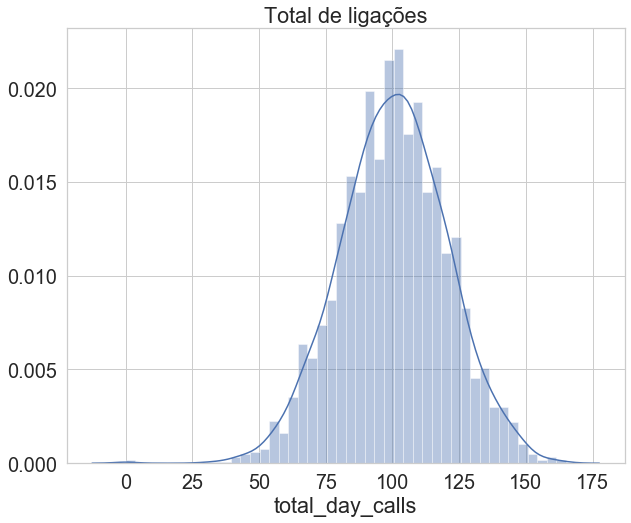

In [33]:
plt.figure(figsize=(10, 8))

plt.title("Total de ligações")
sns.distplot(data_train["total_day_calls"])

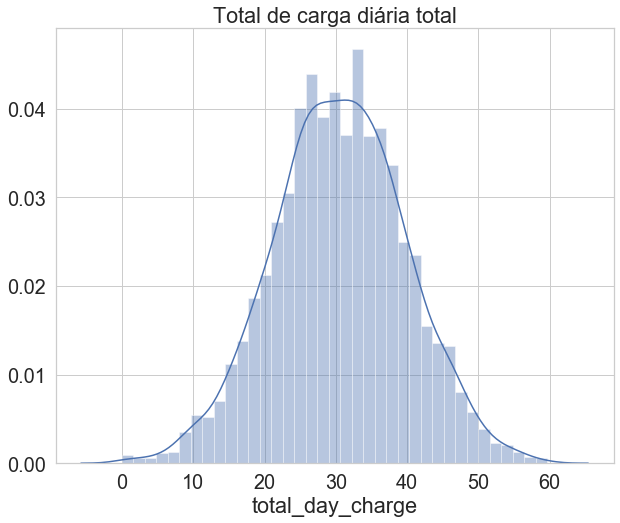

In [34]:
plt.figure(figsize=(10, 8))

plt.title("Total de carga diária total")
sns.distplot(data_train["total_day_charge"])

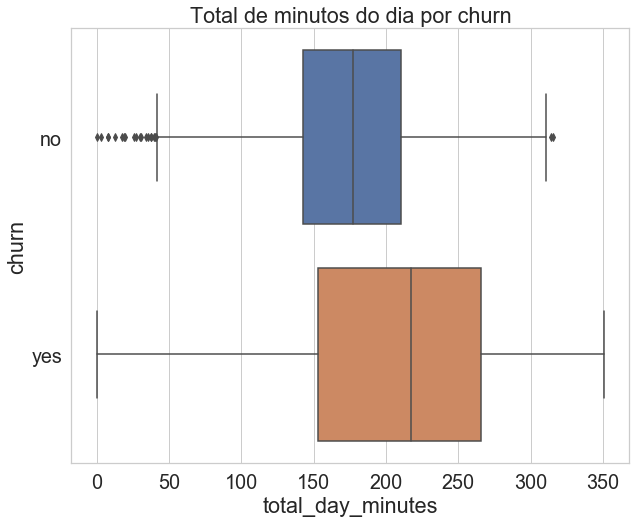

In [35]:
plt.figure(figsize=(10, 8))

plt.title("Total de minutos do dia por churn")
ax = sns.boxplot(x="total_day_minutes" , y="churn", data = data_train)

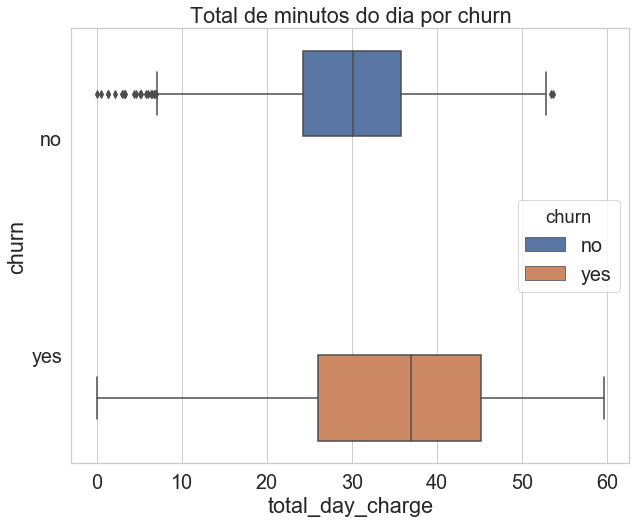

In [36]:
plt.figure(figsize=(10, 8))

plt.title("Total de minutos do dia por churn")
sns.boxplot(x="total_day_charge" , y="churn", data = data_train, hue ="churn")

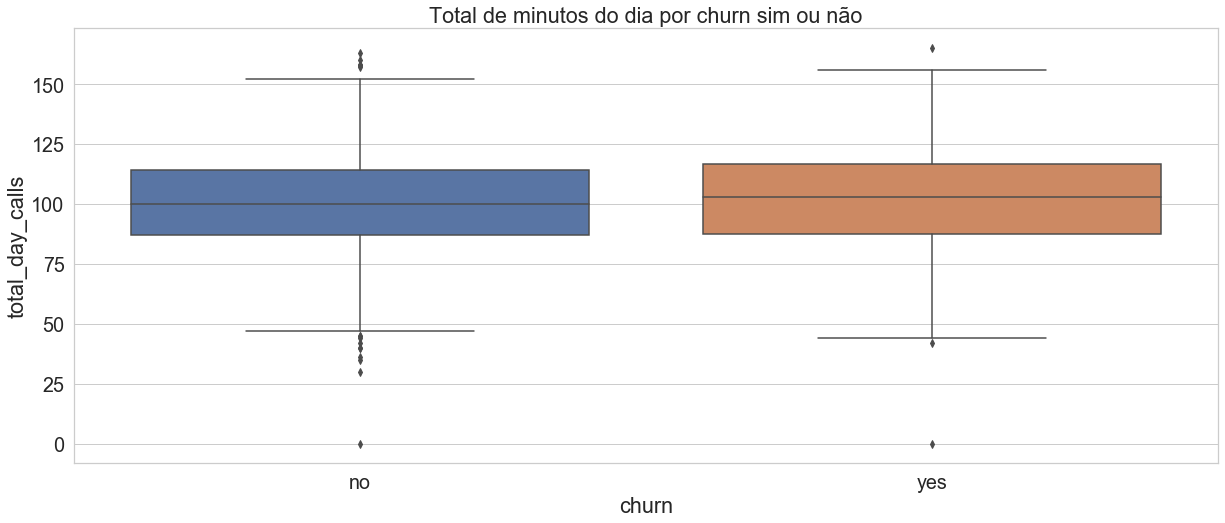

In [38]:
plt.figure(figsize=(20.5, 8))

plt.title("Total de minutos do dia por churn sim ou não")
sns.boxplot(x="churn", y="total_day_calls", data = data_train)

<Figure size 432x288 with 0 Axes>

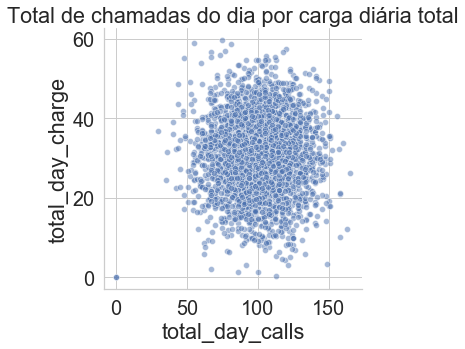

<Figure size 432x288 with 0 Axes>

In [43]:
ax = sns.relplot(x="total_day_calls", y = "total_day_charge", data = data_train, alpha=.5, palette="muted").set(title="Total de chamadas do dia por carga diária total")

plt.figure()

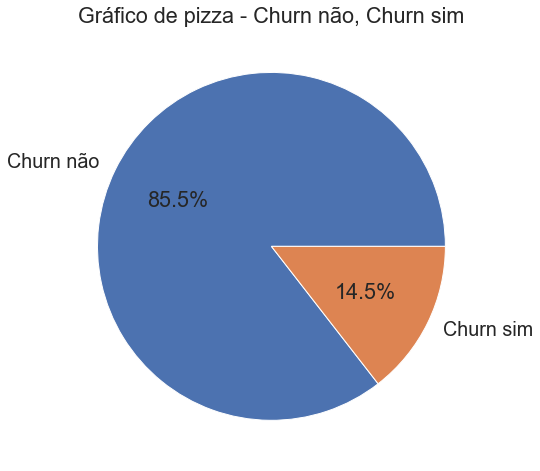

In [46]:
plt.figure(figsize=(15, 8))
plt.title("Gráfico de pizza - Churn não, Churn sim")

plt.pie(df.groupby('churn')['churn'].count(), labels=['Churn não','Churn sim'], autopct='%1.1f%%');

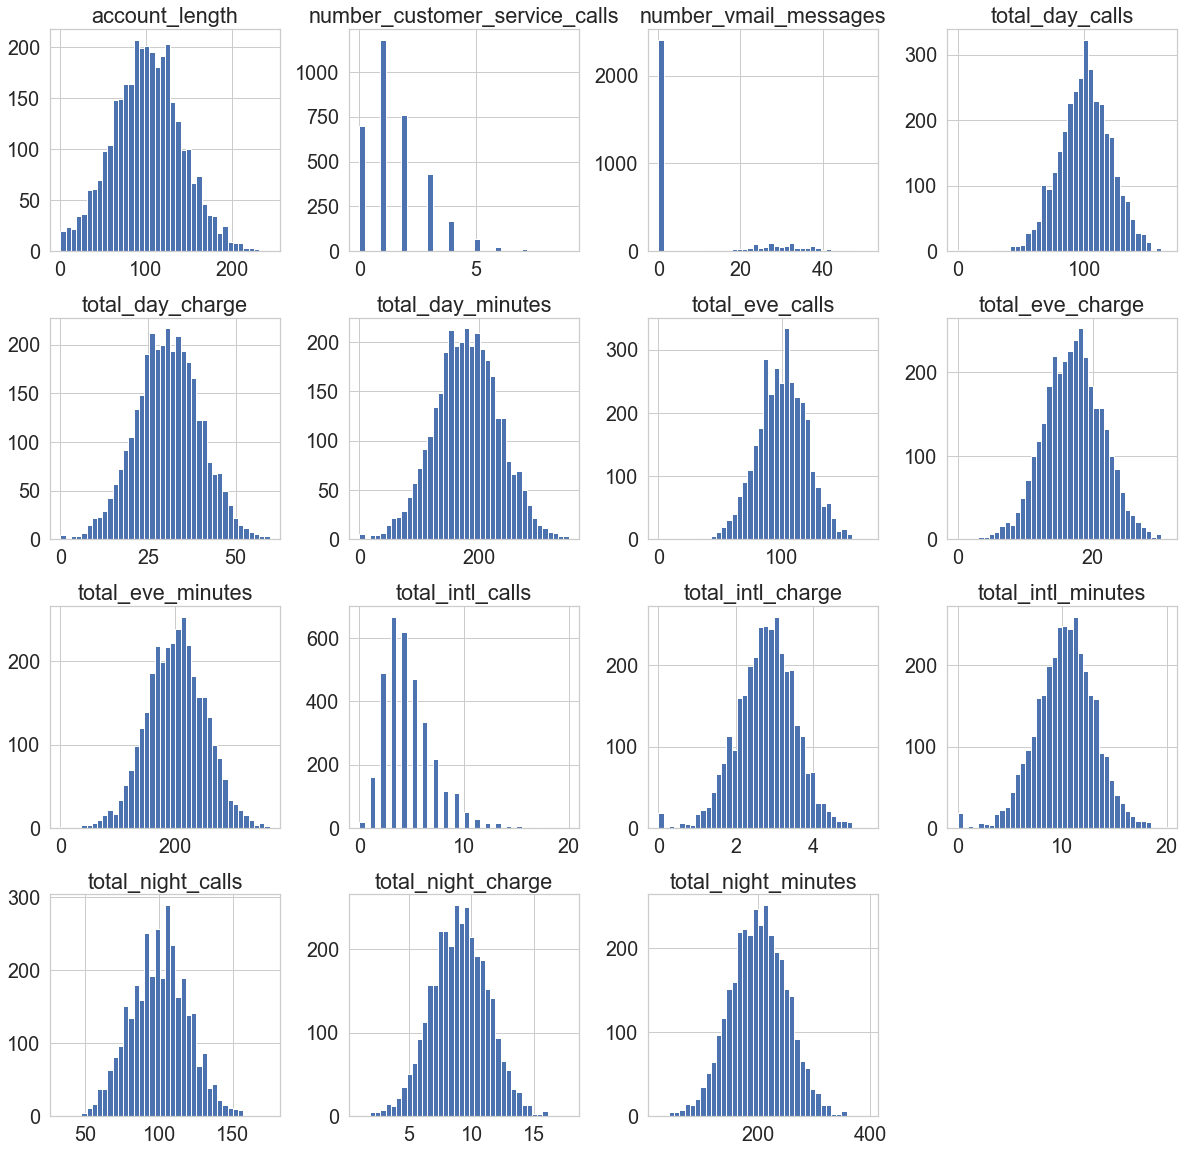

In [48]:
data_train.hist(bins = 40, figsize=(20.2, 20))
plt.title("Gráfico de histograma")
plt.show()

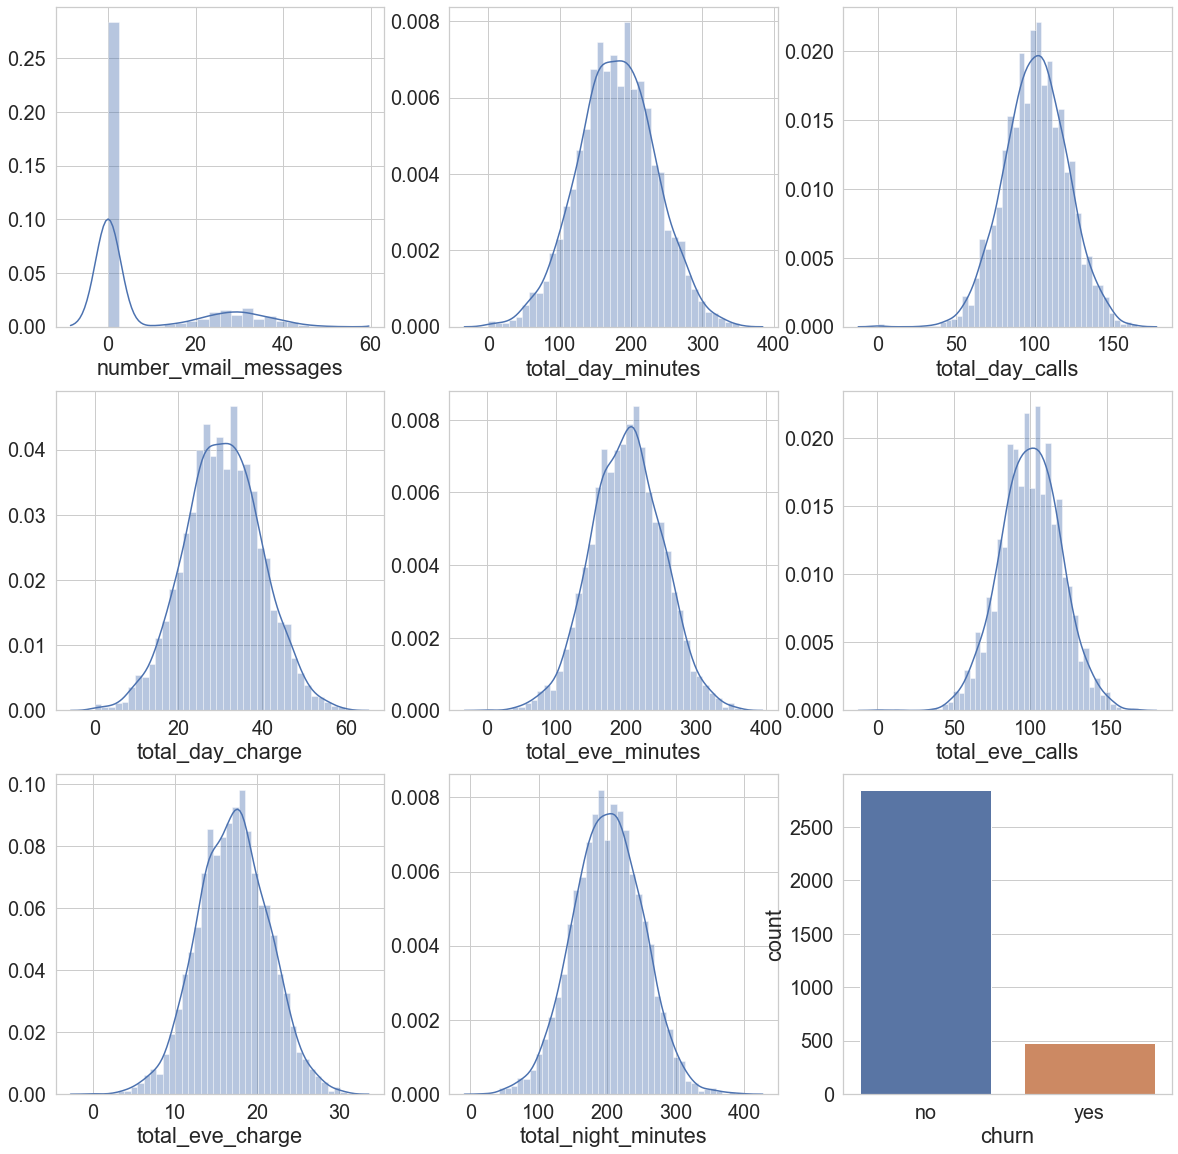

In [49]:
fig1 , axes = plt.subplots(nrows=3,ncols=3 , figsize = (20,20))

sns.distplot(data_train["number_vmail_messages"] , ax=axes[0, 0])
sns.distplot(data_train["total_day_minutes"] ,  ax=axes[0, 1])
sns.distplot(data_train["total_day_calls"] , ax=axes[0, 2])
sns.distplot(data_train["total_day_charge"], ax=axes[1, 0] )
sns.distplot(data_train["total_eve_minutes"] , ax=axes[1, 1] )
sns.distplot(data_train["total_eve_calls"] , ax=axes[1, 2] )
sns.distplot(data_train["total_eve_charge"] , ax=axes[2, 0])
sns.distplot(data_train["total_night_minutes"], ax=axes[2, 1])
sns.countplot(data_train["churn"], ax=axes[2, 2])

plt.show()

# Data Processing

**O processamento de dados começa com os dados em sua forma bruta e os converte em um formato mais legível (gráficos, documentos, etc.), dando-lhes a forma e o contexto necessários para serem interpretados por computadores e utilizados.**

- Exemplo: Uma letra, um valor numérico. Quando os dados são vistos dentro de um contexto e transmite algum significado, tornam-se informações.

In [50]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state                            3333 non-null object
account_length                   3333 non-null int64
area_code                        3333 non-null object
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls           

In [51]:
# Mundando dados texto para númericos

data_train['churn'].loc[data_train['churn']=='no']=1
data_train['churn'].loc[data_train['churn']=='yes']=0

data_train['voice_mail_plan'].loc[data_train['voice_mail_plan']=='no']=1
data_train['voice_mail_plan'].loc[data_train['voice_mail_plan']=='yes']=0

data_train['international_plan'].loc[data_train['international_plan']=='no']=1
data_train['international_plan'].loc[data_train['international_plan']=='yes']=0

data_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,1,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1
1,OH,107,area_code_415,1,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1
2,NJ,137,area_code_415,1,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1
3,OH,84,area_code_408,0,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1
4,OK,75,area_code_415,0,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1


In [52]:
# Mundando os tipo de dados de object para inteiros 

data_train['churn'] = data_train['churn'].astype(int)
data_train['voice_mail_plan'] = data_train['voice_mail_plan'].astype(int)
data_train['international_plan'] = data_train['international_plan'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state                            3333 non-null object
account_length                   3333 non-null int64
area_code                        3333 non-null object
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls           

# Feature Engineering

- Praticamente todos os algoritmos de Aprendizado de Máquina possuem entradas e saídas. As entradas são formadas por colunas de dados estruturados, onde cada coluna recebe o nome de feature, também conhecido como variáveis independentes ou atributos. Essas features podem ser palavras, pedaços de informação de uma imagem, etc. Os modelos de aprendizado de máquina utilizam esses recursos para classificar as informações. 

**Por exemplo, sedentarismo e fator hereditário são variáveis independentes para quando se quer prever se alguém vai ter câncer ou não**  

- As saídas, por sua vez, são chamadas de variáveis dependentes ou classe, e essa é a variável que estamos tentando prever. O nosso resultado pode ser 0 e 1 correspondendo a 'Não' e 'Sim' respectivamente, que responde a uma pergunta como: "Fulano é bom pagador?" ou a probabilidade de alguém comprar um produto ou não.

In [53]:
from sklearn.preprocessing import LabelEncoder

for i in data_train.columns:
    if data_train[i].dtype==np.number:
        continue
    data_train[i]= LabelEncoder().fit_transform(data_train[i])
    
data_train.head(4)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,16,126,1,1,0,19,265.1,70,45.07,197.4,60,16.78,244.7,49,11.01,10.0,3,2.70,1,1
1,35,105,1,1,0,20,161.6,83,27.47,195.5,64,16.62,254.4,61,11.45,13.7,3,3.70,1,1
2,31,135,1,1,1,0,243.4,74,41.38,121.2,71,10.30,162.6,62,7.32,12.2,5,3.29,0,1
3,35,82,0,0,1,0,299.4,31,50.90,61.9,49,5.26,196.9,47,8.86,6.6,7,1.78,2,1


# Treino e Teste

- Treino e teste da base de dados da coluna churn

In [54]:
y = data_train['churn']
x = data_train.drop('churn', axis=1)

In [55]:
# Total de linhas e colunas dados variável x

x.shape

(3333, 19)

In [56]:
# Total de linhas e colunas dados variável y

y.shape

(3333,)

# Escalonamento

- Da coluna x 

In [57]:
from sklearn.preprocessing import StandardScaler

scaler_pre = StandardScaler()
scaler_pre_fit_train = scaler_pre.fit_transform(x)
scaler_pre_fit_train

array([[-6.78649297e-01,  6.81972473e-01, -8.45700361e-04, ...,
        -6.01195090e-01, -8.56904953e-02, -4.27932021e-01],
       [ 6.03169601e-01,  1.51449218e-01, -8.45700361e-04, ...,
        -6.01195090e-01,  1.24116860e+00, -4.27932021e-01],
       [ 3.33312991e-01,  9.09339582e-01, -8.45700361e-04, ...,
         2.11533863e-01,  6.97156372e-01, -1.18821850e+00],
       ...,
       [ 8.73026212e-01, -1.84432874e+00,  1.40851395e+00, ...,
         6.17898340e-01,  1.38712310e+00,  3.32354453e-01],
       [-1.35329082e+00,  2.09670115e+00,  1.40851395e+00, ...,
         2.24335625e+00, -1.87695028e+00,  3.32354453e-01],
       [ 1.07541867e+00, -6.82230182e-01, -8.45700361e-04, ...,
        -1.94830613e-01,  1.24116860e+00, -1.18821850e+00]])

# Modelo treinado para x, y valor

- 20 para os dados de treino e 80 para teste e random state igual a zero

In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [59]:
# Total de linhas e colunas e linhas dos dados de treino x

x_train.shape

(2666, 19)

In [60]:
# Total de linhas dos dados de treino y

y_train.shape

(2666,)

In [61]:
# Total de linhas e colunas dos dados de treino x teste 

x_test.shape

(667, 19)

In [62]:
# Total de linhas e colunas dos dados de treino y teste 

y_test.shape

(667,)

# Modelo machine learning

- Modelo 01 - Random Forest

In [63]:
%%time

from sklearn.ensemble import RandomForestClassifier

model_random_forest = RandomForestClassifier(max_depth = 2, random_state = 0) # max_depth - determinando total de árvore, random_state 0
model_random_forest_fit = model_random_forest.fit(x_train, y_train) # Dados de treino, teste de x, y
model_random_forest_score = model_random_forest.score(x_train, y_train) # Valor da Accuracy do algoritmo 

print("Score - Modelo random forest: %.2f" % (model_random_forest_score * 100))

Score - Modelo random forest: 85.41
Wall time: 172 ms


In [64]:
# Previsão do modelo

model_random_forest_regressor_pred = model_random_forest.predict(x_test)
model_random_forest_regressor_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [65]:
from sklearn.metrics import accuracy_score

accuracy_random_forest = accuracy_score(y_test, model_random_forest_regressor_pred)
print("Accuracy - Random forest: %.2f" % (accuracy_random_forest * 100))

Accuracy - Random forest: 87.11


In [66]:
from sklearn.metrics import confusion_matrix

matrix_confusion = confusion_matrix(y_test, model_random_forest_regressor_pred)
print(matrix_confusion)

[[  2  86]
 [  0 579]]


roc_auc 0.827896844088554


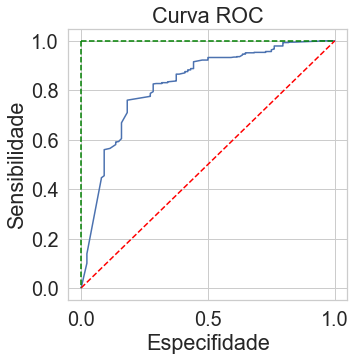

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

roc = model_random_forest.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

#area > 0.8, entao discriminacao excelente!

In [68]:
from sklearn.metrics import classification_report

classification = classification_report(y_test, model_random_forest_regressor_pred)
print("Modelo 01 - Random forest")
print()
print(classification)

Modelo 01 - Random forest

              precision    recall  f1-score   support

           0       1.00      0.02      0.04        88
           1       0.87      1.00      0.93       579

    accuracy                           0.87       667
   macro avg       0.94      0.51      0.49       667
weighted avg       0.89      0.87      0.81       667



In [69]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test, model_random_forest_regressor_pred)
Recall = recall_score(y_test, model_random_forest_regressor_pred)
Accuracy = accuracy_score(y_test, model_random_forest_regressor_pred)
F1_Score = f1_score(y_test, model_random_forest_regressor_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,1.000000
3,F1_Score,0.930868
2,Accuracy,0.871064
0,precision,0.870677


**Modelo 02 - Decision Tree**

In [70]:
%%time
from sklearn.tree import DecisionTreeClassifier

modelo_arvore_cla_1 = DecisionTreeClassifier(max_depth=4, random_state=0)
modelo_arvore_cla_fit = modelo_arvore_cla_1.fit(x_train, y_train)
modelo_arvore_scor = modelo_arvore_cla_1.score(x_train, y_train)

print("Modelo - Decision Tree Classifier: %.2f" % (modelo_arvore_scor * 100))

Modelo - Decision Tree Classifier: 92.87
Wall time: 13 ms


In [72]:
# Previsão do modelo

modelo_arvore_pred = modelo_arvore_cla_1.predict(x_test)
modelo_arvore_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [73]:
acuracia_decision_tree = accuracy_score(y_test, modelo_arvore_pred)

print("Acuracia - Decision Tree: %.2f" % (acuracia_decision_tree * 100))

Acuracia - Decision Tree: 92.20


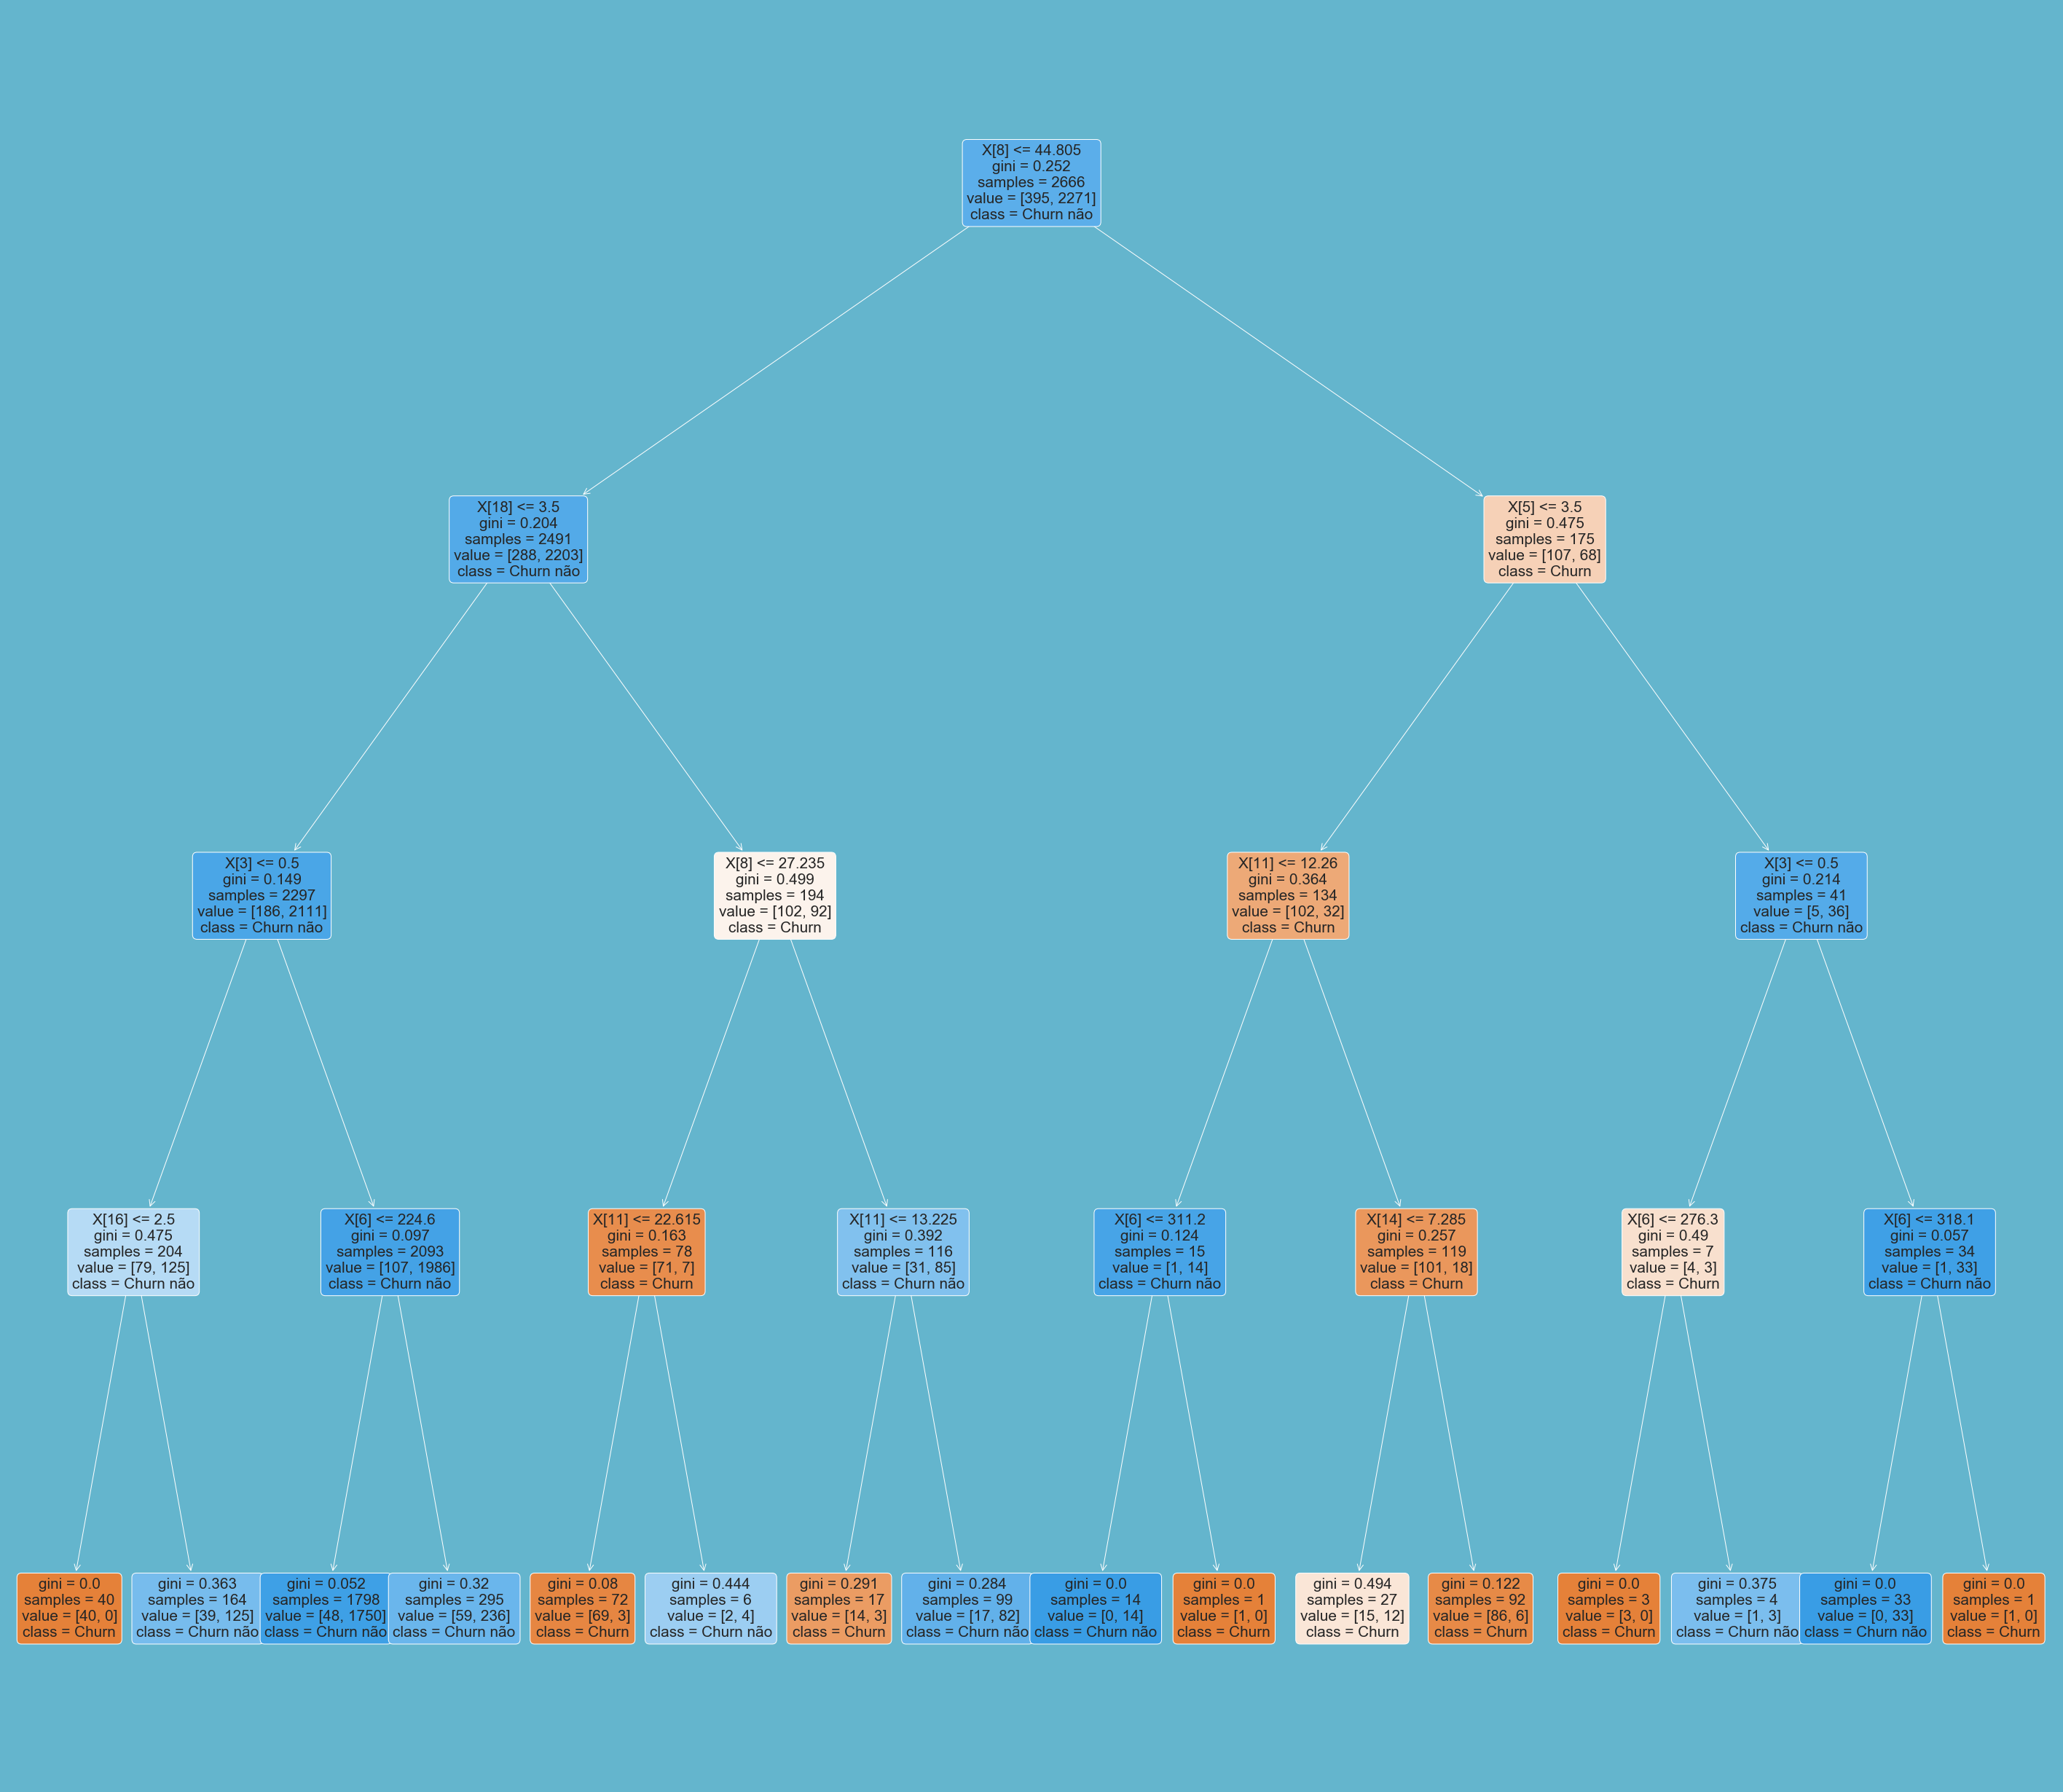

In [74]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(50.5, 45), facecolor = "c")
tree.plot_tree(modelo_arvore_cla_1, 
               ax = ax, 
               fontsize = 20.8, 
               rounded = True, 
               filled = True, 
               class_names = ["Churn", "Churn não"])
plt.show()

roc_auc 0.8728411053540587


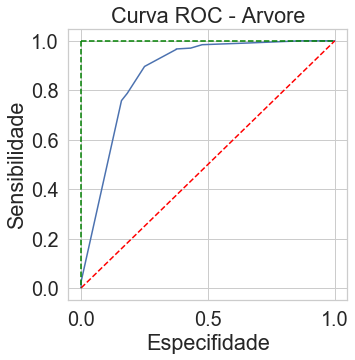

In [75]:
roc = modelo_arvore_cla_1.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Arvore')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

# Área > 0.8, entao discriminacao excelente!

In [76]:
matrix_confusion = confusion_matrix(y_test, modelo_arvore_pred)
#matrix = sns.heatmap(matrix_confusion, vmin=0, vmax=400, cmap = "BuGn_r", linewidths=.6, annot=True ,annot_kws={'size':14} ,fmt=".1f")
matrix_confusion

array([[ 55,  33],
       [ 19, 560]], dtype=int64)

In [77]:
class_report = classification_report(y_test, modelo_arvore_pred)
print("Modelo - Decision Tree")
print("\n")
print(class_report)

Modelo - Decision Tree


              precision    recall  f1-score   support

           0       0.74      0.62      0.68        88
           1       0.94      0.97      0.96       579

    accuracy                           0.92       667
   macro avg       0.84      0.80      0.82       667
weighted avg       0.92      0.92      0.92       667



In [78]:
precision = precision_score(y_test, modelo_arvore_pred)
Recall = recall_score(y_test, modelo_arvore_pred)
Accuracy = accuracy_score(y_test, modelo_arvore_pred)
F1_Score = f1_score(y_test, modelo_arvore_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.967185
3,F1_Score,0.955631
0,precision,0.944351
2,Accuracy,0.922039


# Modelo 03 - Regressão logistica

In [79]:
%%time

from sklearn.linear_model import LogisticRegression

model_regression_logistic = LogisticRegression()
model_regression_logistic_fit = model_regression_logistic.fit(x_train, y_train)
model_regression_logistic_score = model_regression_logistic.score(x_train, y_train)

print("Modelo - Regressão logistica: %.2f" % (model_regression_logistic_score * 100))

Modelo - Regressão logistica: 85.63
Wall time: 41 ms


In [81]:
# Previsão do modelo
model_regression_logistic_pred = model_regression_logistic.predict(x_test)
model_regression_logistic_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [83]:
accuracy_regression_logistic = accuracy_score(y_test, model_regression_logistic_pred)
print("Accuracy -  Logistic regression: %.2f" % (accuracy_regression_logistic * 100))

Accuracy -  Logistic regression: 87.11


In [84]:
matrix_confusion = confusion_matrix(y_test, model_regression_logistic_pred)
matrix_confusion

array([[ 18,  70],
       [ 16, 563]], dtype=int64)

roc_auc 0.8101742816768722


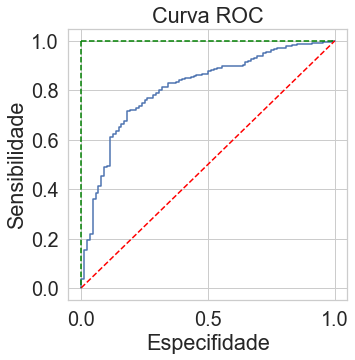

In [85]:
roc = model_regression_logistic.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [86]:
classification = classification_report(y_test, model_regression_logistic_pred)
print("Modelo 03 - Regressão logistica")
print()
print(classification)

Modelo 03 - Regressão logistica

              precision    recall  f1-score   support

           0       0.53      0.20      0.30        88
           1       0.89      0.97      0.93       579

    accuracy                           0.87       667
   macro avg       0.71      0.59      0.61       667
weighted avg       0.84      0.87      0.85       667



In [87]:
precision = precision_score(y_test, model_regression_logistic_pred)
Recall = recall_score(y_test, model_regression_logistic_pred)
Accuracy = accuracy_score(y_test, model_regression_logistic_pred)
F1_Score = f1_score(y_test, model_regression_logistic_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.972366
3,F1_Score,0.929043
0,precision,0.889415
2,Accuracy,0.871064


# Modelo 04 - K-NN

In [88]:
%%time
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn_fit = model_knn.fit(x_train, y_train)
model_knn_score = model_knn.score(x_train, y_train)

print("Modelo - K-NN: %.2f" % (model_knn_score * 100))

Modelo - K-NN: 89.53
Wall time: 157 ms


In [89]:
# Previsão do modelo do k-nn

model_knn_pred = model_knn.predict(x_test)
model_knn_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [90]:
accuracy_knn = accuracy_score(y_test, model_knn_pred)

print("Acurácia - K-NN: %.2f" % (accuracy_knn * 100))

Acurácia - K-NN: 87.11


In [92]:
matrix_confusion = confusion_matrix(y_test, model_knn_pred)
matrix_confusion

#matrix = sns.heatmap(matrix_confusion, vmin=0, vmax=8000, cmap = "Paired", linewidths=.5, annot=True ,annot_kws={'size':14} ,fmt=".1f")
#plt.yticks(rotation=0)
#plt.show()

array([[ 20,  68],
       [ 18, 561]], dtype=int64)

roc_auc 0.626903752551421


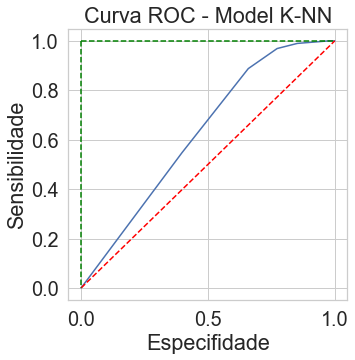

In [93]:
roc = model_knn.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Model K-NN')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

# Área > 0.8, entao discriminacao excelente!

In [94]:
classification = classification_report(y_test, model_knn_pred)
print("Modelo 04 - K-NN")
print()
print(classification)

Modelo 04 - K-NN

              precision    recall  f1-score   support

           0       0.53      0.23      0.32        88
           1       0.89      0.97      0.93       579

    accuracy                           0.87       667
   macro avg       0.71      0.60      0.62       667
weighted avg       0.84      0.87      0.85       667



In [95]:
precision = precision_score(y_test, model_knn_pred)
Recall = recall_score(y_test, model_knn_pred)
Accuracy = accuracy_score(y_test, model_knn_pred)
F1_Score = f1_score(y_test, model_knn_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.968912
3,F1_Score,0.928808
0,precision,0.891892
2,Accuracy,0.871064


# Modelo 05 - Naive bayes

In [96]:
%%time
from sklearn.naive_bayes import GaussianNB

model_naive_bayes = GaussianNB()
model_naive_bayes_fit = model_naive_bayes.fit(x_train, y_train)
model_naive_bayes_score = model_naive_bayes.score(x_train, y_train)
print("Modelo - Naive Bayes: %.2f" % (model_naive_bayes_score * 100))

Modelo - Naive Bayes: 86.72
Wall time: 6 ms


In [97]:
# Previsão do modelo - Naive bayes

model_naive_bayes_pred_predict = model_naive_bayes.predict(x_test)
model_naive_bayes_pred_predict

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [98]:
# Previsão com função probabiliestico do modelo - Naive bayes
model_naive_bayes_pred = model_naive_bayes.predict_proba(x_test)
model_naive_bayes_pred

array([[0.99513786, 0.00486214],
       [0.00129444, 0.99870556],
       [0.18090111, 0.81909889],
       ...,
       [0.0218785 , 0.9781215 ],
       [0.98738013, 0.01261987],
       [0.09520038, 0.90479962]])

In [99]:
accuracy = accuracy_score(y_test, model_naive_bayes_pred_predict)

print("Accuracy Naive bayes: %.2f" % (accuracy * 100))

Accuracy Naive bayes: 85.16


In [102]:
matrix_confusion = confusion_matrix(y_test, model_naive_bayes_pred_predict)
matrix_confusion
#matrix = sns.heatmap(matrix_confusion, vmin=0, vmax=8000, cmap = "Paired", linewidths=.5, annot=True ,annot_kws={'size':14} ,fmt=".1f")
#plt.yticks(rotation=0)
#plt.show()

array([[ 50,  38],
       [ 61, 518]], dtype=int64)

roc_auc 0.8348838122154184


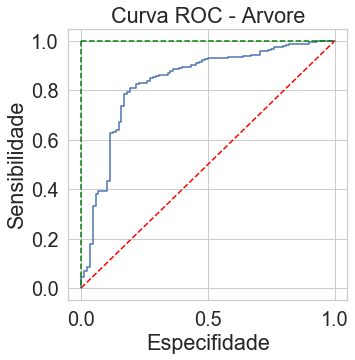

In [103]:
roc = model_naive_bayes.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Arvore')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

# Área > 0.8, entao discriminacao excelente!

In [104]:
class_report = classification_report(y_test, model_naive_bayes_pred_predict)
print("Modelo 05 - Naive Bayes")
print("\n")
print(class_report)

Modelo 05 - Naive Bayes


              precision    recall  f1-score   support

           0       0.45      0.57      0.50        88
           1       0.93      0.89      0.91       579

    accuracy                           0.85       667
   macro avg       0.69      0.73      0.71       667
weighted avg       0.87      0.85      0.86       667



In [105]:
precision = precision_score(y_test, model_naive_bayes_pred_predict)
Recall = recall_score(y_test, model_naive_bayes_pred_predict)
Accuracy = accuracy_score(y_test, model_naive_bayes_pred_predict)
F1_Score = f1_score(y_test, model_naive_bayes_pred_predict)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
0,precision,0.931655
3,F1_Score,0.912775
1,Recall,0.894646
2,Accuracy,0.851574


# Modelo 06 - XGBoost

In [108]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb_fit = xgb.fit(x_train, y_train)
xgb_score = xgb.score(x_train, y_train)
print("Modelo - XGBoost: %.2f" % (xgb_score * 100))

[19:08:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Modelo - XGBoost: 100.00


In [109]:
# Previsão do modelo - XGBoost

xgb_pred = xgb.predict(x_test)
xgb_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [110]:
accuracy_XGBoost = accuracy_score(y_test, xgb_pred)
print("Accuracy - XGBoost: %.2f" % (accuracy_XGBoost * 100))

Accuracy - XGBoost: 95.80


In [127]:
matrix_confusion = confusion_matrix(y_test, xgb_pred)
matrix_confusion

array([[ 73,  15],
       [ 13, 566]], dtype=int64)

roc_auc 0.9252826189354686


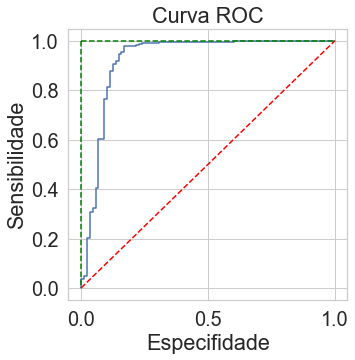

In [113]:
roc = xgb.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [114]:
classification = classification_report(y_test, xgb_pred)
print("Modelo 06 - XGBoost")
print()
print(classification)

Modelo 06 - XGBoost

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        88
           1       0.97      0.98      0.98       579

    accuracy                           0.96       667
   macro avg       0.91      0.90      0.91       667
weighted avg       0.96      0.96      0.96       667



In [115]:
precision = precision_score(y_test, xgb_pred)
Recall = recall_score(y_test, xgb_pred)
Accuracy = accuracy_score(y_test, xgb_pred)
F1_Score = f1_score(y_test, xgb_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.977547
3,F1_Score,0.975862
0,precision,0.974182
2,Accuracy,0.958021


# Modelo 07 - Gradient Boosting

In [116]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

model_gradient_boosting = GradientBoostingClassifier()
model_gradient_boosting_fit = model_gradient_boosting.fit(x_train, y_train)
model_gradient_boosting_score = model_gradient_boosting.score(x_train, y_train)
print("Modelo - Naive Bayes: %.2f" % (model_gradient_boosting_score * 100))

Modelo - Naive Bayes: 97.34
Wall time: 254 ms


In [117]:
# Previsão do modelo - Gradient Boosting

model_gradient_boosting_pred = model_gradient_boosting.predict(x_test)
model_gradient_boosting_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [118]:
accuracy_model_gradient_boosting = accuracy_score(y_test, model_gradient_boosting_pred)

print("Acurácia - Gradient boosting: %.2f" % (accuracy_model_gradient_boosting * 100))

Acurácia - Gradient boosting: 95.65


In [121]:
matrix_confusion = confusion_matrix(y_test, model_gradient_boosting_pred)
matrix_confusion
#matrix = sns.heatmap(matrix_confusion, vmin=0, vmax=8000, cmap = "Paired", linewidths=.5, annot=True ,annot_kws={'size':14} ,fmt=".1f")
#plt.yticks(rotation=0)
#plt.show()

array([[ 69,  19],
       [ 10, 569]], dtype=int64)

roc_auc 0.9192475270843147


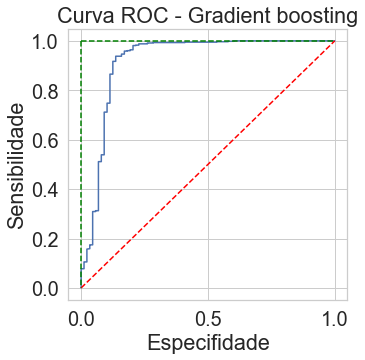

In [122]:
roc = model_gradient_boosting.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Gradient boosting')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

# Área > 0.8, entao discriminacao excelente!

In [123]:
classification = classification_report(y_test, model_gradient_boosting_pred)

print("Modelo - 07 - Gradient boosting")
print("\n")
print(classification)

Modelo - 07 - Gradient boosting


              precision    recall  f1-score   support

           0       0.87      0.78      0.83        88
           1       0.97      0.98      0.98       579

    accuracy                           0.96       667
   macro avg       0.92      0.88      0.90       667
weighted avg       0.96      0.96      0.96       667



In [124]:
precision = precision_score(y_test, model_gradient_boosting_pred)
Recall = recall_score(y_test, model_gradient_boosting_pred)
Accuracy = accuracy_score(y_test, model_gradient_boosting_pred)
F1_Score = f1_score(y_test, model_gradient_boosting_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.982729
3,F1_Score,0.975150
0,precision,0.967687
2,Accuracy,0.956522


In [125]:
# Resultados - Modelos machine learning

modelos = pd.DataFrame({
    
    "Models" :["Regressão logistica", 
                "K-NN", 
                "Random Forest", 
                "Decision Tree",
                "Naive Bayes",
                "XGBoost",
                "Gradient boosting"],

    "Acurácia" :[accuracy_regression_logistic, 
                      accuracy_knn, 
                      accuracy_random_forest, 
                      acuracia_decision_tree,
                      accuracy,
                      accuracy_XGBoost,
                      accuracy_model_gradient_boosting]})

modelos.sort_values(by = "Acurácia", ascending = False)

,Models,Acurácia
5,XGBoost,0.958021
6,Gradient boosting,0.956522
3,Decision Tree,0.922039
0,Regressão logistica,0.871064
1,K-NN,0.871064
2,Random Forest,0.871064
4,Naive Bayes,0.851574


# Salvando modelo Machine learning

In [128]:
import pickle
    
with open('model_random_forest_regressor_pred.pkl', 'wb') as file:
    pickle.dump(model_random_forest_regressor_pred, file)
    
with open('modelo_arvore_pred.pkl', 'wb') as file:
    pickle.dump(model_knn_pred, file)
    
with open('model_regression_logistic_pred.pkl', 'wb') as file:
    pickle.dump(model_regression_logistic_pred, file)
    
with open('model_knn_pred.pkl', 'wb') as file:
    pickle.dump(model_knn_pred, file)

with open('model_naive_bayes_pred_predict.pkl', 'wb') as file:
    pickle.dump(model_naive_bayes_pred_predict, file)

with open('xgb_pred.pkl', 'wb') as file:
    pickle.dump(xgb_pred, file)
    
with open('model_gradient_boosting_pred.pkl', 'wb') as file:
    pickle.dump(model_gradient_boosting_pred, file)

# Conclusão

- Os modelos tiveram boas acurácias como XGBoost, Gradient boosting, Decision Tree.

- Resultados do churn das matriz de confusões foi xgboost, Gradient boosting, decision tree esses modelos tiveram uma classificação boa do churn.

- Primeiro passo fazer hiperparâmetro e validação, hiperparâmetros do modelo Naive Bayes, Random Forest.

**Por o modelo em produção do churn usando flask, streamlit.**